In [73]:
%matplotlib inline
%config InlineBackend.figure_format= 'retina'
import numpy as np
import torch
import helper
import torch.utils.data
import matplotlib.pyplot as plt
!wget -c https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py

--2020-01-25 18:15:56--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [0]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)



1.   Using nn in pytorch
2.   We create class named network
3.   super().__init__() to make your call, which is concise and does not require you to reference the parent OR class names explicitly
4.    Example of class in python: <br/>class Complex:
<br/>     def __init__(self, realpart, imagpart):
<br />self.r = realpart
<br/> self.i = imagpart
<br/> x = Complex(3.0, -4.5)
<br />x.r, x.i
<br/>(3.0, -4.5)
5.    Forward function shows output from input tensors



In [0]:
from torch import nn

In [0]:
#torch.nn.functional you can define network concisely and clearly
#element wise function is used, which is called as F
import torch.nn.functional as F
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.hidden = nn.Linear(784,256)
    self.output = nn.Linear(256,10)

  def forward(self, x):
    x = F.sigmoid(self.hidden(x))
    x = F.softmax(self.output(x),dim=1)
    return x

Create a network with 784 input units, a hidden layer with 128 units and a ReLU activation, then a hidden layer with 64 units and a ReLU activation, and finally an output layer with a softmax activation as shown above. You can use a ReLU activation with the nn.ReLU module or F.relu function.

In [98]:
#Solution
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.hidden1 = nn.Linear(784,128)
    self.hidden2 = nn.Linear(128,64)
    self.output = nn.Linear(64,10)
  def forward(self,x):
    x = F.relu(self.hidden1(x))
    x = F.relu(self.hidden2(x))
    x = F.sigmoid(self.output(x),dim=1)
    return x
model = Network()
model

Network(
  (hidden1): Linear(in_features=784, out_features=128, bias=True)
  (hidden2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
)

In [0]:
# it is a good practice to use fc1, fc2 , fc3 instead of input, output, hiden

In [100]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784,128)
    self.fc2 = nn.Linear(128,64)
    self.fc3 = nn.Linear(64,10)
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.softmax(self.fc3(x), dim=1)
    return x
model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [101]:

#initializing weights and biases
 
print(model.fc1.weight)
print(model.fc1.bias)

Parameter containing:
tensor([[-0.0255, -0.0185,  0.0220,  ...,  0.0125,  0.0323, -0.0182],
        [-0.0244,  0.0282,  0.0283,  ...,  0.0062, -0.0137,  0.0017],
        [ 0.0321, -0.0154,  0.0050,  ...,  0.0332,  0.0274, -0.0162],
        ...,
        [ 0.0083, -0.0209, -0.0337,  ..., -0.0268, -0.0074, -0.0102],
        [ 0.0060,  0.0229, -0.0131,  ..., -0.0122,  0.0035,  0.0062],
        [-0.0086, -0.0327,  0.0107,  ..., -0.0244, -0.0304, -0.0030]],
       requires_grad=True)
Parameter containing:
tensor([-0.0201,  0.0157,  0.0136,  0.0332,  0.0314,  0.0027, -0.0051,  0.0163,
         0.0199, -0.0114,  0.0180,  0.0132,  0.0043,  0.0290, -0.0167, -0.0321,
        -0.0289,  0.0310,  0.0164, -0.0076, -0.0185, -0.0284,  0.0066,  0.0033,
         0.0340,  0.0032,  0.0130, -0.0274,  0.0189, -0.0098,  0.0117,  0.0132,
        -0.0128,  0.0176,  0.0116, -0.0209, -0.0067, -0.0294,  0.0257, -0.0314,
        -0.0209, -0.0155, -0.0106, -0.0004,  0.0108, -0.0323,  0.0316, -0.0220,
         0.0077

In [102]:
#To set biases to all zeros
model.fc1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [103]:
#sample from random normal with standard deviation = 0.01
model.fc1.weight.data.normal_(std=0.01)

tensor([[-0.0046,  0.0166,  0.0005,  ..., -0.0042,  0.0100,  0.0069],
        [-0.0029, -0.0137,  0.0062,  ...,  0.0121,  0.0119,  0.0149],
        [ 0.0056, -0.0107,  0.0183,  ...,  0.0119,  0.0058, -0.0060],
        ...,
        [-0.0036, -0.0033,  0.0062,  ..., -0.0082, -0.0134, -0.0210],
        [-0.0103, -0.0090,  0.0043,  ...,  0.0081,  0.0206,  0.0023],
        [-0.0035,  0.0009, -0.0022,  ...,  0.0006, -0.0095,  0.0054]])

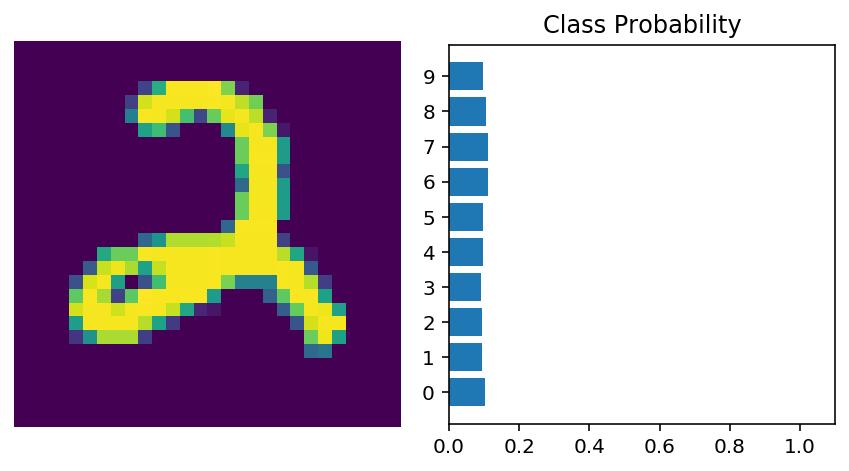

In [104]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels) 
images.resize_(64, 1, 784)
# or images.resize_(images.shape[0], 1, 784) to automatically get batch size

# Forward pass through the network
img_idx = 0
ps = model.forward(images[img_idx,:])

img = images[img_idx]
view_classify(img.view(1, 28, 28), ps)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


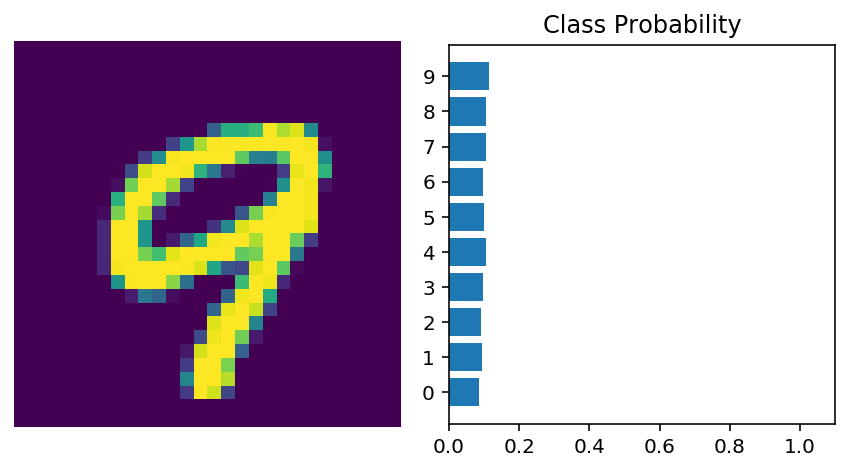

In [109]:
#from above we get to know that its making no improvement since we are not prividng any error 
# or providing correction to it

#before that using nn.sequential as well we can build networks
input_size = 784
hidden_sizes = [128, 64]
output_size = 10
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0],hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
view_classify(images[0].view(1, 28, 28), ps)

In [110]:
print(model[0])
model[0].weight

Linear(in_features=784, out_features=128, bias=True)


Parameter containing:
tensor([[ 0.0046, -0.0201, -0.0018,  ..., -0.0158,  0.0279, -0.0202],
        [-0.0138, -0.0275, -0.0151,  ...,  0.0016,  0.0114, -0.0337],
        [ 0.0338,  0.0246,  0.0100,  ..., -0.0063, -0.0119,  0.0187],
        ...,
        [ 0.0273,  0.0043, -0.0258,  ..., -0.0034,  0.0045, -0.0134],
        [ 0.0117,  0.0219,  0.0069,  ...,  0.0221, -0.0127, -0.0212],
        [ 0.0194,  0.0238, -0.0090,  ..., -0.0095, -0.0039, -0.0096]],
       requires_grad=True)

In [111]:
# using orderdict
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))
model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

In [112]:
print(model[0])
print(model.fc1)

Linear(in_features=784, out_features=128, bias=True)
Linear(in_features=784, out_features=128, bias=True)
